In [1]:
import sys
sys.path.append('../..')
from models import Aggregate, Appliance

/home/morgan/anaconda3/envs/eloadsenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/morgan/anaconda3/envs/eloadsenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Consultando os dados de uma instância da classe Aggregate

In [2]:
aggregate = Aggregate.get_aggregate(origin_dataset_name='ukdale', location='house_1')[0]

In [3]:
samples = aggregate.get_samples(quantity_name=['apparent_power'])

In [4]:
samples.head()

,apparent_power
timestamp,
2012-11-09 22:28:15,599.0
2012-11-09 22:28:21,582.0
2012-11-09 22:28:27,600.0
2012-11-09 22:28:33,586.0
2012-11-09 22:28:40,596.0


In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

### O gráfico dos seus samples evidencia que o resultado do método get_samples está de acordo com o que era imaginado

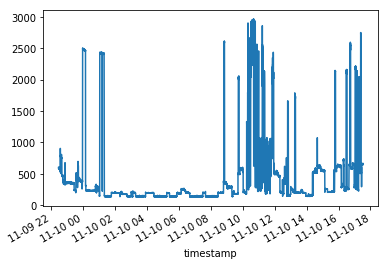

In [6]:
samples['apparent_power'][0:10000].plot()

## A seguir, são consultados dados de um Appliance que está no mesmo circuito do Aggregate anterior

In [7]:
appliance = Appliance.get_appliances(origin_dataset_name='ukdale', location='house_1', appliance_type_name='refrigerator')[0]

appliance_samples = appliance.get_samples(quantity_name=['active_power'])

### Podemos ver que há 2 ativações nesta janela de dados recuperados

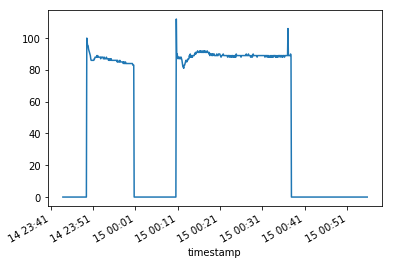

In [8]:
appliance_samples['active_power'][800:1500].plot()

In [9]:
activations = appliance.get_activations(df=appliance_samples[800:1500], quantity_name=['active_power'])

## A seguir, o método get_activations foi utilizado para recuperar as ativações do aparelho dentro da janela exibida no gráfico acima. A seguir, são apresentados os gráficos destas ativações, evidenciando que sua execução teve o resultado esperado

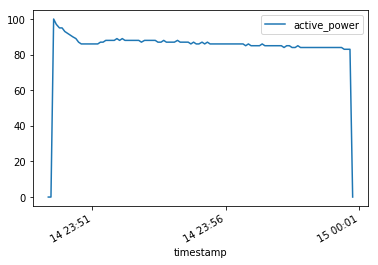

In [10]:
activations[0].plot()

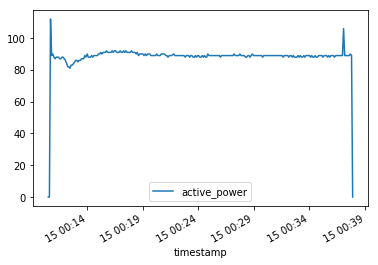

In [11]:
activations[1].plot()

### A seguir é testado o método get_activation_aggregate que deve recuperar os samples do Aggregate correspondentes ao período de uma dada ativação

In [26]:
aggregate_activation_samples, pad_left = Aggregate.get_activation_aggregate(activation=activations[1], 
                                                                            appliance=appliance, 
                                                                            window_size=512, 
                                                                            quantity_name=['apparent_power'], 
                                                                            sampling_period=6, is_start=True)

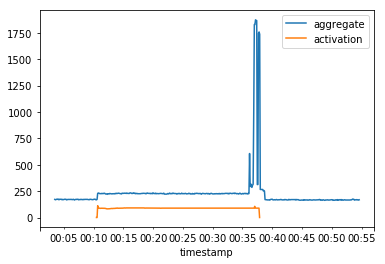

In [31]:
ax = aggregate_activation_samples['apparent_power'].plot(label='aggregate')
activations[1].plot(ax=ax, label='activation')
plt.legend(['aggregate', 'activation'])
plt.show()

## Podemos ver no gráfico acima que a janela de aggregate corresponde exatamente à janela de activation de entrada